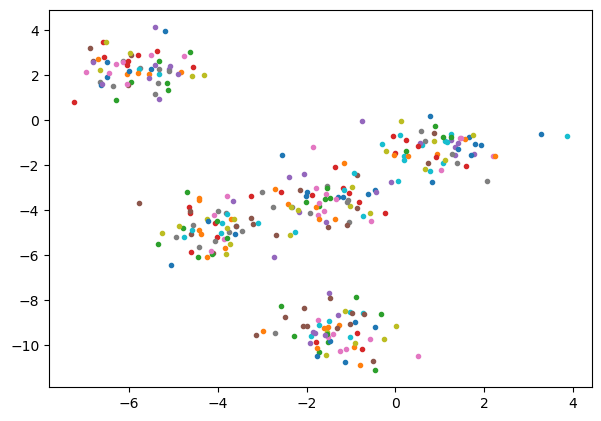

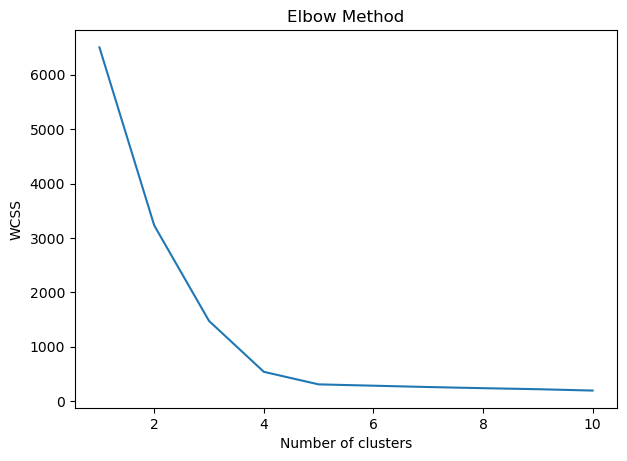

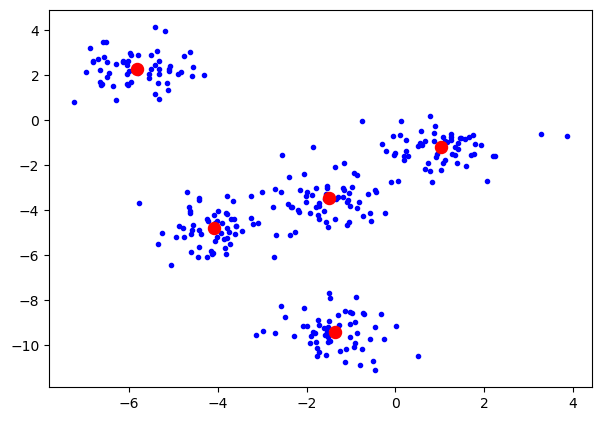

In [36]:
#!/usr/bin/python
#KMeans.ipynb
#Parth Parakh
#purpose: Coursework

#the function implements the KMeans algorithm. 
#X is a matrix containing observations, with X(i,j) being component h of observation i
#the function outputs the assignment of observations to clusters and the
#coordinates of the centroids

#---------------------------------------------------------------------
#import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#----------------------------------------------------------------------    

sample_no=300;
c=5;
c_std=0.70;
rs=2;
X, y = make_blobs(n_samples=sample_no, centers=c, cluster_std=c_std, random_state=rs)

plot1 = plt.figure(1,figsize=(7,5), dpi=100)
for i in range(n_samples):
    plt.plot(X[i][0],X[i][1],".")

#Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=rs)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plot2 = plt.figure(2,figsize=(7,5), dpi=100)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=rs)
pred_y = kmeans.fit_predict(X)
plot3 = plt.figure(3,figsize=(7,5), dpi=100)
plt.scatter(X[:,0], X[:,1],  c='b', marker = '.')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='r', marker = '.')
plt.show()

In [43]:
N = len(X) # number of observations
p = len(X[0]) # number of features

no_loops = 100;

assignment = np.random.randint(c, size=N)+1  #ceiling
centroids = np.zeros([c,p]) 
for s in range(no_loops):   
    index_1 = []
    index_2 = []
    index_3 = []
    index_4 = []
    index_5 = []
    for i in range(N):
        if assignment[i] == 1:
            index_1.append(X[i])
        if assignment[i] == 2:
            index_2.append(X[i])
        if assignment[i] == 3:
            index_3.append(X[i])
        if assignment[i] == 4:
            index_4.append(X[i])
        if assignment[i] == 5:
            index_5.append(X[i])
            
    centroids[0] = np.mean(index_1, axis = 0)
    centroids[1] = np.mean(index_2, axis = 0)
    centroids[2] = np.mean(index_3, axis = 0)
    centroids[3] = np.mean(index_4, axis = 0)
    centroids[4] = np.mean(index_5, axis = 0)
    for i in range(N):
        d = np.zeros(c)
        for j in range(c):
            for r in range(p):
                d[j] = d[j] + (X[i][r]-centroids[j][r])**2
            d[j] = np.sqrt(d[j])
        m = np.where(d == np.amin(d))
        assignment[i] = m[0]+1

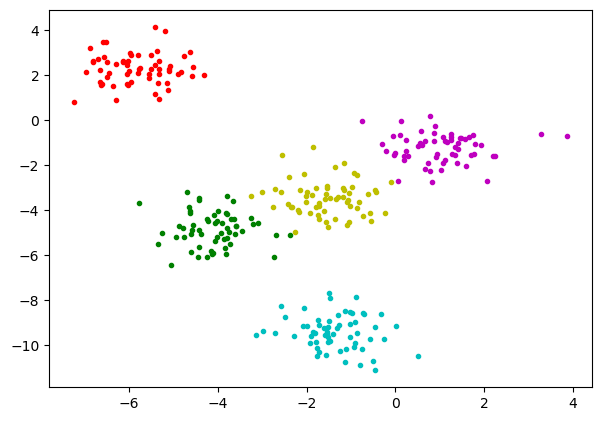

In [47]:
plot4 = plt.figure(4,figsize=(7,5), dpi=100)
for i in range(len(index_1)):
    plt.plot(index_1[i][0],index_1[i][1],"r.")
for i in range(len(index_2)):
    plt.plot(index_2[i][0],index_2[i][1],"c.")
for i in range(len(index_3)):
    plt.plot(index_3[i][0],index_3[i][1],"m.")
for i in range(len(index_4)):
    plt.plot(index_4[i][0],index_4[i][1],"g.")
for i in range(len(index_5)):
    plt.plot(index_5[i][0],index_5[i][1],"y.")